this tests the GLM wrapper code, testing both backends.

this will use real data, to get a sense of runtime. particularly for MATLAB.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# timer.
import time
class Timer(object):
    def __init__(self, name=None):
        self.name = name

    def __enter__(self):
        self.tstart = time.time()

    def __exit__(self, type, value, traceback):
        if self.name:
            print('[%s]' % self.name, end=' ')
        print('Elapsed: %s' % (time.time() - self.tstart))

In [3]:
import numpy as np
from tang_jcompneuro.io import load_split_dataset
from tang_jcompneuro.glm import glm_wrapper, family_backend_selector
from tang_jcompneuro.eval import eval_fn_corr_raw

In [4]:
datasets = load_split_dataset('MkA_Shape', 'all', True, 553, last_val=False, suffix='linear')

In [5]:
def print_dataset_shape():
    for x in datasets:
        print(x.shape)
        
print_dataset_shape()

(6080, 400)
(6080, 1)
(1520, 400)
(1520, 1)
(1900, 400)
(1900, 1)


In [6]:
def check_every_one():
    for family, backends in family_backend_selector.items():
        first_one = None
        for backend in backends:
            with Timer(f'{family}/{backend}'):
                result = glm_wrapper(datasets, alpha=1.0, family=family, standardize=False,
                                    backend=backend, debug=True)
            assert len(result) == 2
            assert result[0].shape == (datasets[-1].size,)
            if first_one is None:
                first_one = result[0]
            else:
                print(eval_fn_corr_raw(first_one[:,np.newaxis], result[0][:,np.newaxis]))
            print('test performance', result[1])
            
            # show plot
            result1_debug = eval_fn_corr_raw(result[0][:,np.newaxis], datasets[-1])
            assert result1_debug == result[1]
            plt.close('all')
            plt.figure()
            plt.scatter(datasets[-1].ravel(), result[0])
            plt.axis('equal')
            plt.plot([datasets[-1].min(),datasets[-1].max()],
                     [datasets[-1].min(),datasets[-1].max()])
            plt.show()

/home/yimengzh_everyday/miniconda2/envs/tf15/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: Matrix

  warnings.warn(x, RRuntimeWarning)
/home/yimengzh_everyday/miniconda2/envs/tf15/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: foreach

  warnings.warn(x, RRuntimeWarning)
/home/yimengzh_everyday/miniconda2/envs/tf15/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loaded glmnet 2.0-13


  warnings.warn(x, RRuntimeWarning)


train size (6080, 400) (6080, 1)
val size (1520, 400) (1520, 1)


/home/yimengzh_everyday/miniconda2/envs/tf15/lib/python3.6/site-packages/scipy/stats/stats.py:3003: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


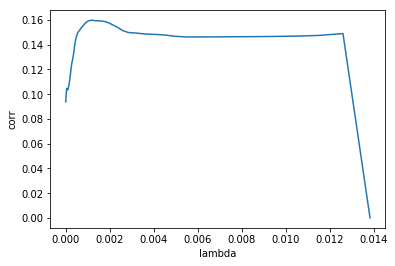

best lambda 0.0012311147052401943
test size (1900, 400) (1900, 1)
[gaussian/R] Elapsed: 3.6675689220428467
test performance 0.166827931252


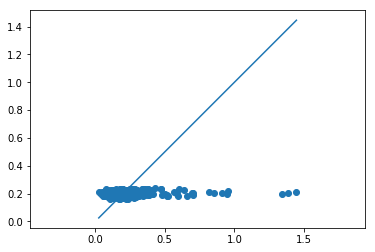

train size (6080, 400) (6080, 1)
val size (1520, 400) (1520, 1)


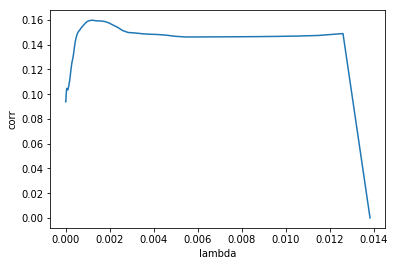

best lambda 0.0012311147052401928
test size (1900, 400) (1900, 1)
[gaussian/MATLAB] Elapsed: 35.8167564868927
1.0
test performance 0.166827933427


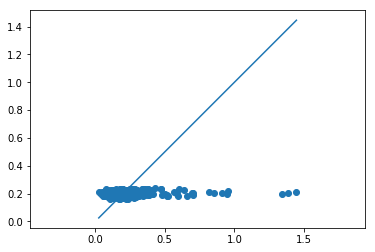

train size (6080, 400) (6080, 1)
val size (1520, 400) (1520, 1)


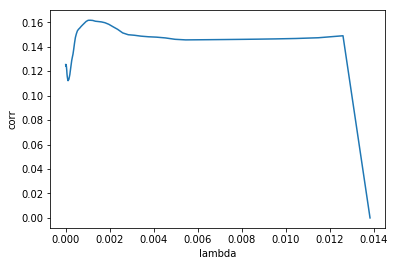

best lambda 0.0011217458679209599
test size (1900, 400) (1900, 1)
[poisson/R] Elapsed: 3.1582820415496826
test performance 0.168710379559


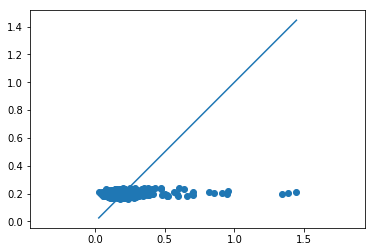

train size (6080, 400) (6080, 1)
val size (1520, 400) (1520, 1)


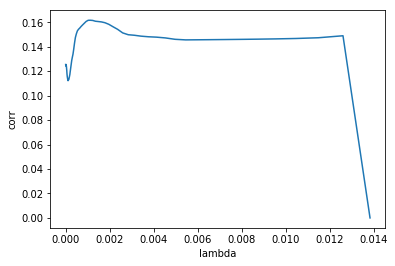

best lambda 0.0011217458679209616
test size (1900, 400) (1900, 1)
[poisson/MATLAB] Elapsed: 39.617220401763916
1.0
test performance 0.168710373304


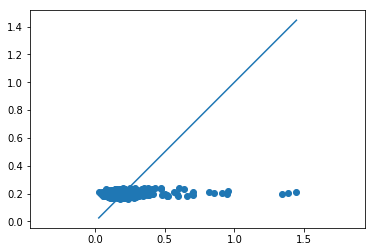

train size (6080, 400) (6080, 1)
val size (1520, 400) (1520, 1)


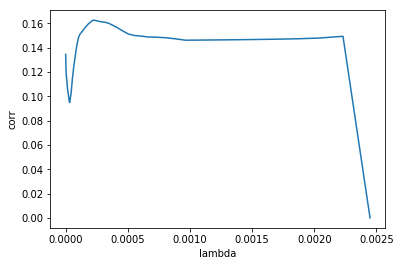

best lambda 0.0002179343665096136
test size (1900, 400) (1900, 1)
[softplus/MATLAB] Elapsed: 103.93151903152466
test performance 0.171676370398


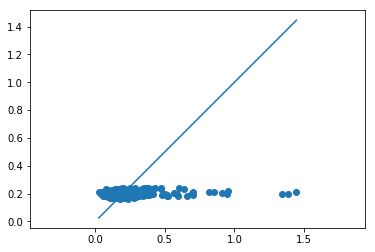

In [7]:
check_every_one()